In [1]:
import numpy as np
import matplotlib.pyplot as plt

import math

import jlinops
import sampi

In [34]:
#ground_truth = jlinops.seaice()[:1000,:1000]
ground_truth = jlinops.seaice()[:300,:300]

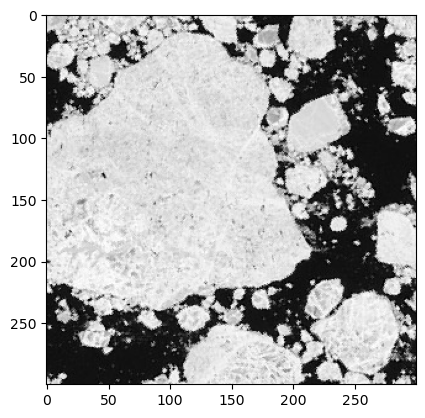

In [35]:
plt.imshow(ground_truth, cmap="gray")
plt.show()

In [36]:
img_shape = ground_truth.shape
print(img_shape)
noise_sigma = 0.05
n = math.prod(ground_truth.shape)
#F = jlinops.IdentityOperator((n,n))
F = jlinops.Gaussian2DBlurOperator(img_shape, blur_sigma=4.0)
noise_var = noise_sigma**2
np.random.seed(0)
noisy_signal = F.matvec(ground_truth.flatten()) + noise_sigma*np.random.normal(size=n)

(300, 300)


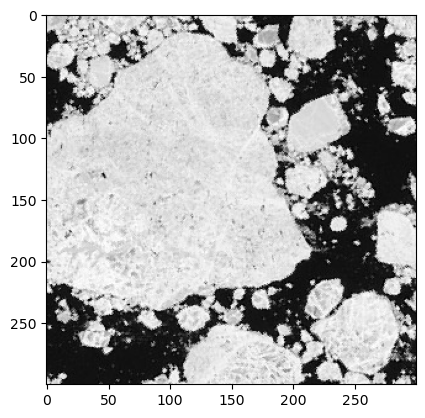

In [37]:
plt.imshow(ground_truth, cmap="gray")
plt.show()

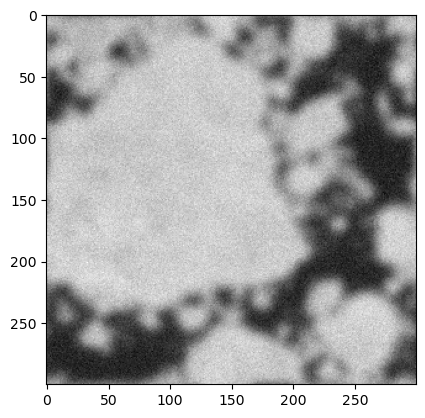

In [38]:
plt.imshow(noisy_signal.reshape(img_shape), cmap="gray")
plt.show()

In [39]:
W = np.ones(n)/np.linalg.norm(np.ones(n))
W = jlinops.MatrixLinearOperator(W)

R = jlinops.Neumann2D(img_shape)
def Rpinv_factory(theta):
    return jlinops.CGWeightedNeumann2DPinvOperator(img_shape, weights=1.0/np.sqrt(theta), tol=1e-5)

pdata = {
    "W": W,
    "Rpinv_factory": Rpinv_factory,
}

In [40]:
Rpinv = Rpinv_factory(np.ones(R.shape[0]))

In [41]:
Rpinv @ np.random.normal(size=Rpinv.shape[1])

array([ 0.68766296,  0.84932601,  1.10165884, ..., -0.16564629,
        0.82069927,  1.05811754])

In [47]:
# # Prior parameters
# reg_lambda = 1e3
# vartheta = 2/(reg_lambda**2)
# hyperparams = {
#     "prior": {
#         "r": 1.0,
#         "beta": 1.5 + 1e-2,
#         "vartheta": vartheta,
#     },
#     # "noise_var": {
#     #     "r": -1.0,
#     #     "beta": 1,
#     #     "vartheta": 1e-4,
#     # }
# }


# Prior parameters
hyperparams = {
    "prior": {
        "r": -1.0,
        "beta": 1.0,
        "vartheta": 1e-3,
    },
    # "noise_var": {
    #     "r": -1.0,
    #     "beta": 1,
    #     "vartheta": 1e-4,
    # }
}



# Create solver
solver = sampi.IASSolver(F, R, noisy_signal, hyperparams, noise_var=noise_var, pdata=pdata)

In [50]:
data = solver.solve(max_iters=25, priorconditioning=False, early_stopping=True, warmstarting=True, eps=1e-3)

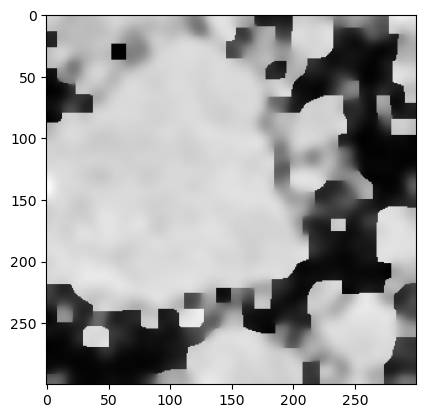

In [51]:
plt.imshow( data["x"].reshape(img_shape) , cmap="gray")
plt.show()

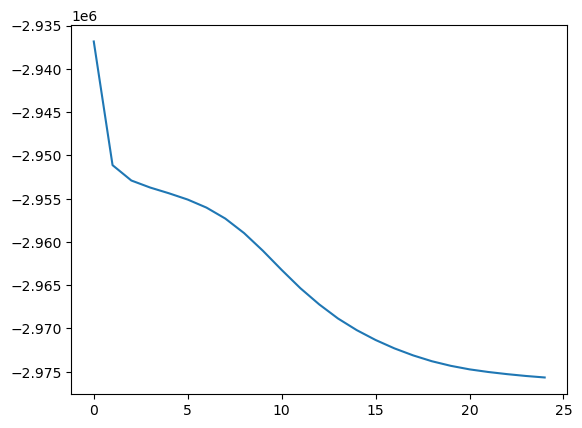

In [52]:
plt.plot(data["obj_vals"])
plt.show()

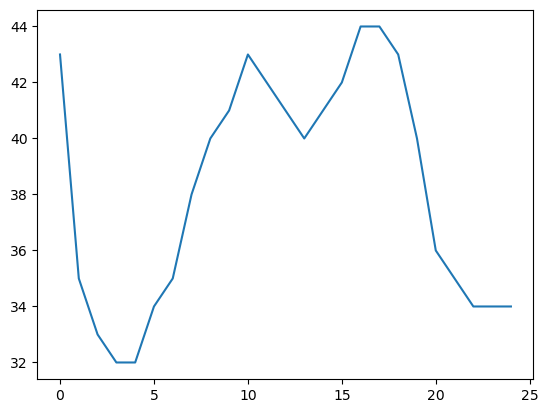

In [53]:
plt.plot(data["n_cg_its_per_iteration"])
plt.show()